# Task 1 - Fake News Detection

In [1]:
# Import Libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import re
import string

import nltk

from nltk.corpus import stopwords

In [3]:
# Loading the Dataset

In [4]:
df_fake = pd.read_csv('Fake.csv')
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true = pd.read_csv('True.csv')
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# Inserting a column "class" as target feature

In [7]:
df_fake["class"] = 0
df_true["class"] = 1

In [8]:
# Merging true and fake Datasets

In [9]:
df = pd.concat([df_fake,df_true],axis = 0)
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [10]:
# checking null/misssing values

In [11]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [12]:
# shuffling the data

In [13]:
df = df.sample(frac =1)

In [14]:
df.reset_index(inplace = True)
df.drop(['index'],axis=1,inplace= True)

In [15]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
df = df.drop(['title', 'subject', 'date'], axis=1)

In [17]:
df.head()

,text,class
0,CHICAGO (Reuters) - U.S. farm groups criticize...,1
1,Brilliant conservative and American Thinker co...,0
2,WASHINGTON (Reuters) - President Donald Trump ...,1
3,WASHINGTON (Reuters) - The White House said on...,1
4,WASHINGTON (Reuters) - President Barack Obama ...,1


<AxesSubplot:xlabel='class', ylabel='count'>

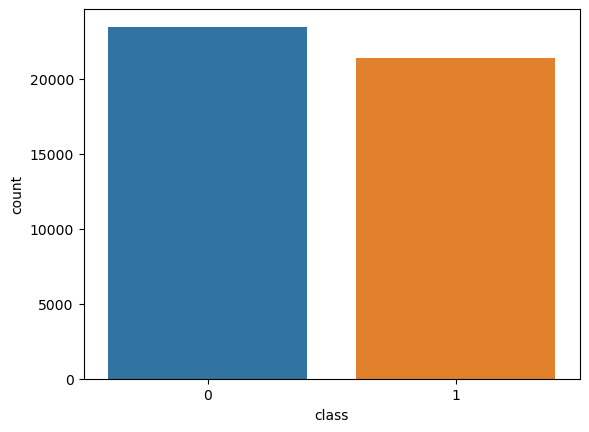

In [18]:
sns.countplot(df['class'])

In [19]:
# Create a function to process the text

In [20]:
def remove_punctuations(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub('', '', text)
    text = re.sub("\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

    return text

In [21]:
df['text'] = df['text'].apply(remove_punctuations)

In [22]:
stop_words = stopwords.words('english')

In [23]:
df['text'] == df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

0        False
1        False
2        False
3        False
4        False
         ...  
44893    False
44894    False
44895    False
44896    False
44897    False
Name: text, Length: 44898, dtype: bool

In [24]:
# Defining independent and dependent Variables

In [25]:
x = df['text']
y = df['class']

In [26]:
# splitting Training and Testing data

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25)

In [28]:
# convert text to vectors

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(xtrain)
x_test = vectorization.transform(xtest)
     

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,ytrain)

lr_pred = lr.predict(x_test)
print(accuracy_score(lr_pred,ytest))
print(classification_report(lr_pred,ytest))

0.9853006681514477
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5813
           1       0.99      0.98      0.98      5412

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



Text(50.722222222222214, 0.5, 'True Labels')

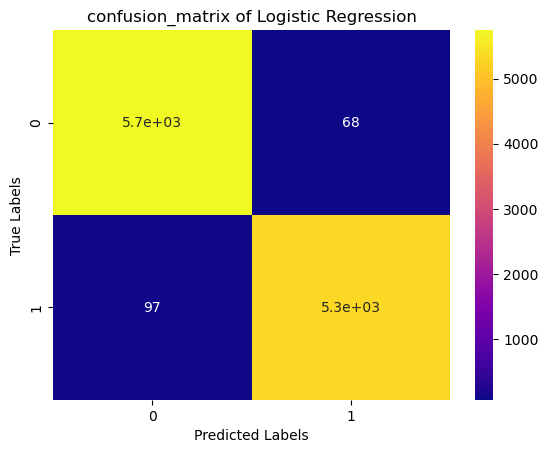

In [31]:
sns.heatmap(confusion_matrix(lr_pred,ytest),annot=True,cmap = 'plasma')
plt.title('confusion_matrix of Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# DecisionTree Classification

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,ytrain)

dt_pred = dt.predict(x_test)

print(accuracy_score(dt_pred,ytest))
print(classification_report(dt_pred,ytest))

0.9965256124721603
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5841
           1       1.00      1.00      1.00      5384

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



Text(50.722222222222214, 0.5, 'True Labels')

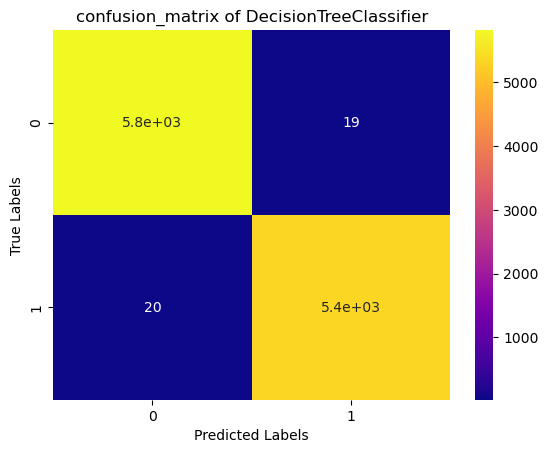

In [33]:
sns.heatmap(confusion_matrix(dt_pred,ytest),annot=True,cmap = 'plasma')
plt.title('confusion_matrix of DecisionTreeClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train,ytrain)

rfc_pred = rfc.predict(x_test)

print(accuracy_score(rfc_pred,ytest))
print(classification_report(rfc_pred,ytest))

0.9897550111358575
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5851
           1       0.99      0.99      0.99      5374

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



Text(50.722222222222214, 0.5, 'True Labels')

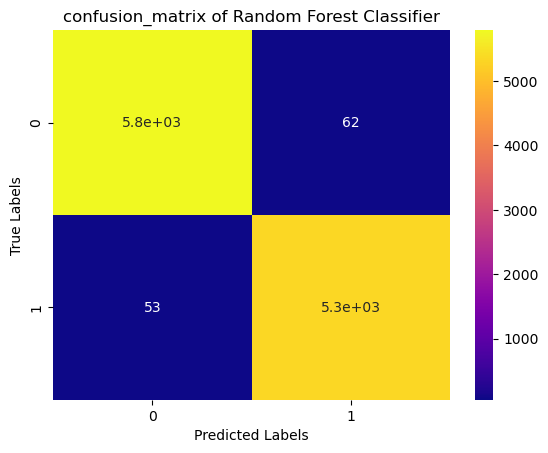

In [35]:
sns.heatmap(confusion_matrix(rfc_pred,ytest),annot=True,cmap = 'plasma')
plt.title('confusion_matrix of Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')